In [12]:
import numpy as np
import pandas as pd
import os

In [13]:
# # importing os module 
# import os 
  
# # Function to rename multiple files 

# i = 0

# for filename in os.listdir("./female face images/"): 
#     dst ="0_" + str(i) + "_0.jpeg"
#     src ='./female face images/'+ filename 
#     dst ='./female face images/'+ dst 

#     # rename() function will 
#     # rename all the files 
#     os.rename(src, dst) 
#     i += 1



In [14]:
# # importing os module 
# import os 
  
# # Function to rename multiple files 

# i = 0

# for filename in os.listdir("./male face images/"): 
#     dst ="1_" + str(i) + "_1.jpeg"
#     src ='./male face images/'+ filename 
#     dst ='./male face images/'+ dst 

#     # rename() function will 
#     # rename all the files 
#     os.rename(src, dst) 
#     i += 1

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import seaborn as sns
import glob
import cv2
import re
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
#Here I have a about 200 images in the below folder 'train' glob will get all the images from folder here
path = glob.glob('./images of face/*.jpeg')
image=[]
for img in path:
    v = cv.imread(img) #It will loads all the images from a file
    blur = cv.GaussianBlur(v,(5,5),0)
    gray = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)# here changing  color image to gray scale
    image.append(gray)

In [17]:
image[0].max()

IndexError: list index out of range

In [7]:
names=os.listdir('./images of face/')#it will get on the images names from a directory
string = ''.join(names)
result=re.findall(r'(\d)_\d*_',string)
face = list(map(int, result))
len(face) , string

(250,
 '0_113_0.jpeg1_34_1.jpeg0_26_0.jpeg0_42_0.jpeg0_79_0.jpeg1_21_1.jpeg1_44_1.jpeg1_61_1.jpeg1_0_1.jpeg1_107_1.jpeg0_1_0.jpeg0_120_0.jpeg0_77_0.jpeg1_13_1.jpeg1_73_1.jpeg0_6_0.jpeg0_59_0.jpeg0_98_0.jpeg0_87_0.jpeg0_112_0.jpeg1_43_1.jpeg1_9_1.jpeg1_78_1.jpeg0_4_0.jpeg0_8_0.jpeg0_11_0.jpeg1_38_1.jpeg1_48_1.jpeg0_102_0.jpeg1_115_1.jpeg0_27_0.jpeg0_36_0.jpeg0_85_0.jpeg1_16_1.jpeg0_97_0.jpeg1_116_1.jpeg0_23_0.jpeg0_24_0.jpeg1_4_1.jpeg1_95_1.jpeg1_18_1.jpeg0_122_0.jpeg0_92_0.jpeg1_90_1.jpeg1_6_1.jpeg1_27_1.jpeg1_12_1.jpeg0_5_0.jpeg0_51_0.jpeg1_59_1.jpeg1_2_1.jpeg0_86_0.jpeg1_50_1.jpeg0_44_0.jpeg1_104_1.jpeg1_91_1.jpeg1_55_1.jpeg1_20_1.jpeg0_80_0.jpeg1_88_1.jpeg0_16_0.jpeg0_52_0.jpeg1_53_1.jpeg0_17_0.jpeg1_69_1.jpeg1_39_1.jpeg0_34_0.jpeg1_86_1.jpeg1_24_1.jpeg0_57_0.jpeg0_39_0.jpeg0_126_0.jpeg0_89_0.jpeg1_72_1.jpeg0_46_0.jpeg0_10_0.jpeg0_93_0.jpeg0_105_0.jpeg0_114_0.jpeg0_82_0.jpeg0_28_0.jpeg1_19_1.jpeg1_28_1.jpeg0_101_0.jpeg0_73_0.jpeg0_99_0.jpeg1_56_1.jpeg0_14_0.jpeg1_23_1.jpeg1_35_1.jpe

In [8]:
import cv2
face_cascade = cv2.CascadeClassifier('./xml/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
# face_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('C:\\opencv\\build\\etc\\haarcascades\\haarcascade_eye.xml')

img = cv2.imread('./images of face/0_113_0.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.max()

254

Text(0.5, 1.0, 'original Image')

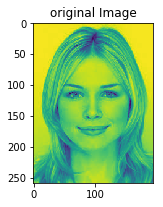

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(1,6,1)
plt.imshow(gray)
plt.title('original Image')


In [10]:
img.shape

(259, 194, 3)

In [19]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade.detectMultiScale(roi_gray)
#     for (ex,ey,ew,eh) in eyes:
#         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
     
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#  roi_color = image[y:y + h, x:x + w]
#     print("[INFO] Object found. Saving locally.")
#     cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

# status = cv2.imwrite('faces_detected.jpg', image)
# print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

In [34]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255,0, 0), 2)
    roi_color = img[y:y + h, x:x + w]
    print("[INFO] Object found. Saving locally.")
    cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

status = cv2.imwrite('faces_detected.jpg', img)
print("[INFO] Image faces_detected.jpg written to filesystem: ", status)    


[INFO] Object found. Saving locally.
[INFO] Image faces_detected.jpg written to filesystem:  True


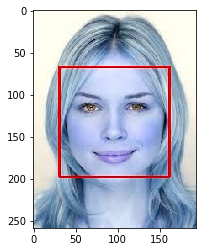

In [35]:
#detected = cv2.imread('./faces_detected.jpg')
plt.imshow(detected)

In [37]:
det_face = detected[y:y+h,x:x+w]

In [39]:
cv2.imwrite('file.png',det_face)

True